## Import necessary packages.

In [1]:
import qiime2 as q2
from deepphylo.rpca import rclr,rpca_table
from deepphylo.mystem_rpca import import_and_process_data, Phylo_RPCA, RPCA_PCA
from deepphylo.plot import plot_2d
import pandas as pd
%matplotlib inline

## Configure paths.

In [2]:
table_path = 'data_phyloRPCA/urbmerged.biom'
metadata_path = 'data_phyloRPCA/10333_20190808-130957.txt'
tree_path = 'data_phyloRPCA/tree.qza'
taxonomy = q2.Artifact.load('data_phyloRPCA/taxonomy.qza')    

## Preprocessing to obtain information on the table, metadata, and evolutionary tree.

In [3]:
table, bt, metadata, tree = import_and_process_data(table_path, metadata_path, tree_path)

In [4]:
print(table.view(pd.DataFrame).head(3))

                           TACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTCTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGT  \
10333.Manaus.3346.1313696                                               34.0                                                      
10333.Manaus.3546.1313272                                              142.0                                                      
10333.Manaus.3708.1313460                                                0.0                                                      

                           TACAGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGTGTAGGTGGCTCATTAAGTCACATGTGAAATCCCCGGGCTTAACCTGGGAACTG  \
10333.Manaus.3346.1313696                                              184.0                                                      
10333.Manaus.3546.1313272                                              506.0                                                      
10333.Manaus.3708.1313460                                             1038.0      

In [5]:
table_matrix = bt.to_dataframe().T
table_matrix_rclr = rclr(table_matrix)

## Abundance based RPCA

In [6]:
from deepphylo.mystem_rpca import RPCA_with_abundance
table_matrix_rclr, df_table_abundance_rclr, sample_loading_abundance_3d, colors = RPCA_with_abundance(bt,table_matrix_rclr)

In [7]:
sample_loading_abundance_3d

,PC1,PC2,PC3
10333.Manaus.3346.1313696,-0.062700,0.032890,-0.095675
10333.Manaus.3546.1313272,-0.088815,0.020992,0.001975
10333.Manaus.3708.1313460,-0.088330,-0.158770,-0.111032
10333.Manaus.3318.1313403,-0.090491,-0.019124,-0.080730
10333.Manaus.3372.1313934,-0.051201,0.064899,-0.157518
...,...,...,...
10333.Iqu.1038.huma,0.002337,-0.030238,0.077053
10333.Iqu.1127.huma,0.041955,0.133582,0.047127
10333.Iqu.1086.huma,-0.044493,-0.046280,0.106294
10333.Man.1810.huma,-0.053563,0.047922,-0.088778


## RPCA and Evolutionary Tree

In [8]:
tntree, sample_loading_phyloRPCA_3d = Phylo_RPCA(tree,bt)

In [9]:
sample_loading_phyloRPCA_3d

,PC1,PC2,PC3
10333.Manaus.3346.1313696,-0.098832,0.088878,0.039366
10333.Manaus.3546.1313272,-0.062573,0.008617,-0.059647
10333.Manaus.3708.1313460,-0.118512,-0.000342,-0.049709
10333.Manaus.3318.1313403,-0.109181,0.078134,-0.070047
10333.Manaus.3372.1313934,-0.102422,0.144802,0.061849
...,...,...,...
10333.Iqu.1038.huma,0.039547,-0.115407,0.098577
10333.Iqu.1127.huma,0.077447,-0.058108,0.158215
10333.Iqu.1086.huma,-0.003302,-0.115030,0.019829
10333.Man.1810.huma,-0.049763,0.066707,0.041066


## RPCA+PCA dimensionality reduction fusion

In [10]:
sample_evol_feature_20d_normalized,sample_merged_feature_2d = RPCA_PCA(bt, tntree, table_matrix_rclr,df_table_abundance_rclr)

In [11]:
sample_merged_feature_2d[:10]

array([[-0.16147226, -1.20714053],
       [-0.69076771, -1.4745762 ],
       [-0.28840671, -1.67339234],
       [-0.58136369, -1.88203752],
       [ 0.02551264, -1.55567639],
       [-0.92213819,  0.86147515],
       [-0.35102376, -0.5532606 ],
       [-0.52707382, -0.32788362],
       [-0.73256831, -0.91546569],
       [ 0.12026374, -0.84178886]])

/home/syl/DeepPhylo/deepphylo/plot.py:98: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


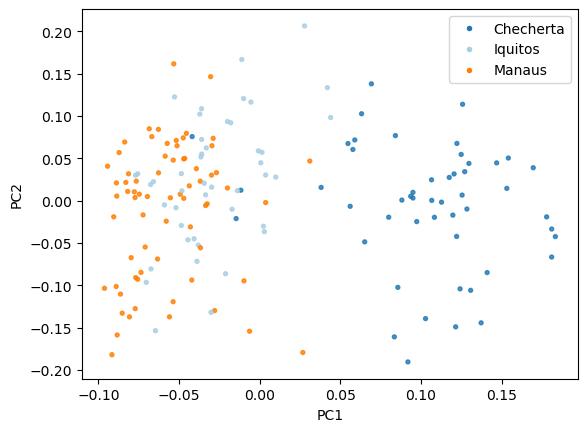

In [12]:
plot_2d(sample_loading_abundance_3d,colors)

/home/syl/DeepPhylo/deepphylo/plot.py:113: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


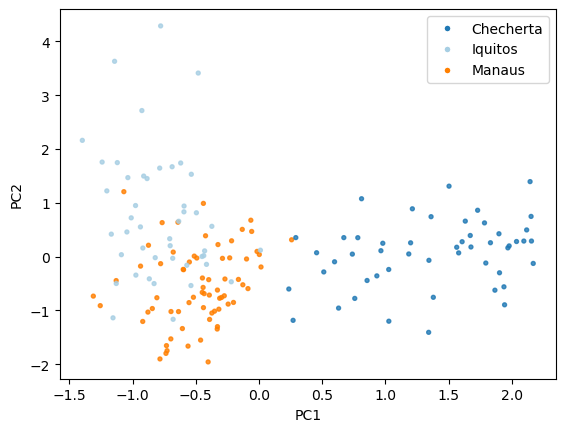

In [13]:
plot_2d(sample_evol_feature_20d_normalized,colors)

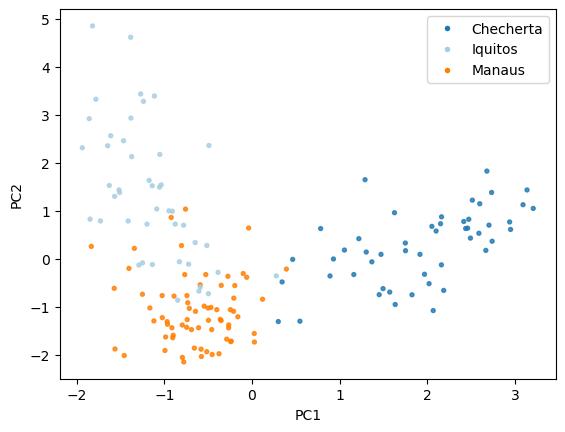

In [14]:
plot_2d(sample_merged_feature_2d,colors)